## Observations and Insights

## Dependencies and starter code

# Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

1.- Capomulin and Ramicane has significantly more data points than the other 8 drugs, aprox 25% more.
2.- All tumors value started at the same point 45mm3. This can be reviewed on Extra point line 100 of this code.
3.- Capomulin and Ramicane are the only two drugs that reduce the tumor volume along time.
4.- Naftisol, Ketapril & Stelasyn Tumor Volume results are even bigger than the placebo so might be drugs not recommended.
5.- From the Best 4 Ceftamin and Propriva are Drugs that reduces the growth of the tumor volume but not reduces the volume from the original status. They are under the best for because average tumor volume is lower than the placebo average, how ever the diference is only of 3.95mm for Ceftamin vs Placebo and 1.83mm for Propriva vs Placebo.
6.- Best options to use are Capomulin and Ramicane.
7.- There is no Outliers for Capomulin so this might demonstrate a stable usage and results.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_metadata = mouse_metadata.set_index("Mouse ID")
study_results = study_results.set_index("Mouse ID")

Data_df = pd.merge(mouse_metadata, study_results, how='outer', on=['Mouse ID'])
Data_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
StatsPerTimepoint = Data_df.groupby(["Drug Regimen","Timepoint"])[["Tumor Volume (mm3)"]].mean()
DrugMean = Data_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].mean()
DrugMean = DrugMean.rename(columns={"Tumor Volume (mm3)":"T.Vol. Mean(mm3)"})
DrugMedian = Data_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].median()
DrugMedian = DrugMedian.rename(columns={"Tumor Volume (mm3)":"T.Vol. Median(mm3)"})
DrugVar = Data_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].var()
DrugVar = DrugVar.rename(columns={"Tumor Volume (mm3)":"T.Vol. Variance(mm3)"})
DrugSD = Data_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].std()
DrugSD = DrugSD.rename(columns={"Tumor Volume (mm3)":"T.Vol. SD(mm3)"})
DrugSEM = Data_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].sem()
DrugSEM = DrugSEM.rename(columns={"Tumor Volume (mm3)":"T.Vol. SEM(mm3)"})
DrugSTATS = pd.concat([DrugMean, DrugMedian, DrugVar , DrugSD, DrugSEM], axis=1)
DrugSTATS = DrugSTATS.style.format({'T.Vol. Mean(mm3)': "{:.2f}",
                                    'T.Vol. Median(mm3)': "{:,.2f}",
                                    'T.Vol. Variance(mm3)': "{:.2f}",
                                    'T.Vol. SD(mm3)': "{:.2f}",
                                    'T.Vol. SEM(mm3)': "{:.2f}",
                                   })

DrugSTATS


,T.Vol. Mean(mm3),T.Vol. Median(mm3),T.Vol. Variance(mm3),T.Vol. SD(mm3),T.Vol. SEM(mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [75]:
# EXTRA Easiest way to do the same table
DrugSTATS = Data_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].mean()
DrugSTATS = DrugSTATS.rename(columns={"Tumor Volume (mm3)":"T.Vol. Mean(mm3)"})
DrugSTATS["T.Vol. Median(mm3)"] = Data_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].median()
DrugSTATS["T.Vol. Variance(mm3)"]  = Data_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].var()
DrugSTATS["T.Vol. SD(mm3)"] = Data_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].std()
DrugSTATS["T.Vol. SEM(mm3)"] = Data_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].sem()
DrugSTATS = DrugSTATS.style.format({'T.Vol. Mean(mm3)': "{:.2f}",
                                    'T.Vol. Median(mm3)': "{:,.2f}",
                                    'T.Vol. Variance(mm3)': "{:.2f}",
                                    'T.Vol. SD(mm3)': "{:.2f}",
                                    'T.Vol. SEM(mm3)': "{:.2f}",
                                   })

StatsPerTimepoint

In [80]:
#EXTRA Statistics Per Timepoint
StatsPerTimepoint = Data_df.groupby(["Drug Regimen","Timepoint"])[["Tumor Volume (mm3)"]].mean()
StatsPerTimepoint = StatsPerTimepoint.rename(columns={"Tumor Volume (mm3)":"T.Vol. Mean(mm3)"})
StatsPerTimepoint["T.Vol. Median(mm3)"] = Data_df.groupby(["Drug Regimen","Timepoint"])[["Tumor Volume (mm3)"]].median()
StatsPerTimepoint["T.Vol. Variance(mm3)"]  = Data_df.groupby(["Drug Regimen","Timepoint"])[["Tumor Volume (mm3)"]].var()
StatsPerTimepoint["T.Vol. SD(mm3)"] = Data_df.groupby(["Drug Regimen","Timepoint"])[["Tumor Volume (mm3)"]].std()
StatsPerTimepoint["T.Vol. SEM(mm3)"] = Data_df.groupby(["Drug Regimen","Timepoint"])[["Tumor Volume (mm3)"]].sem()
StatsPerTimepoint2 = StatsPerTimepoint.style.format({'T.Vol. Mean(mm3)': "{:.2f}",
                                    'T.Vol. Median(mm3)': "{:,.2f}",
                                    'T.Vol. Variance(mm3)': "{:.2f}",
                                    'T.Vol. SD(mm3)': "{:.2f}",
                                    'T.Vol. SEM(mm3)': "{:.2f}",
                                   })

StatsPerTimepoint2


In [121]:
#EXTRA dynamic search per Time point or Drug

#List of Drugs
CA = "Capomulin"
CE = "Ceftamin"
IN = "Infubinol"
KE = "Ketapril"
NA = "Naftisol"
PL = "Placebo"
PR = "Propriva"
RA = "Ramicane"
ST = "Stelasyn"
ZO = "Zoniferol"

#Filter by Time point options are... 0,5,10,15,20,25,30,35,40 & 45
VTimepoint = "45" # Remove or place Hashtag to use this filter
PTimepoint = StatsPerTimepoint[StatsPerTimepoint.index.isin([VTimepoint], level=1)]

# Filter by Drug use the list above wich shoy to use in capital letters 
# the first Two letters of the Drug name.
PTimepoint.loc[[CA,CE,PL]] # Remove or place Hashtag to use this filter


,,T.Vol. Mean(mm3),T.Vol. Median(mm3),T.Vol. Variance(mm3),T.Vol. SD(mm3),T.Vol. SEM(mm3)
Drug Regimen,Timepoint,,,,,
Capomulin,45,36.236114,37.311846,31.460537,5.608969,1.223977
Ceftamin,45,64.132421,64.299830,10.585242,3.253497,0.902358
Placebo,45,68.084082,69.042841,20.098783,4.483167,1.351726


## Bar plots

(0, 250)

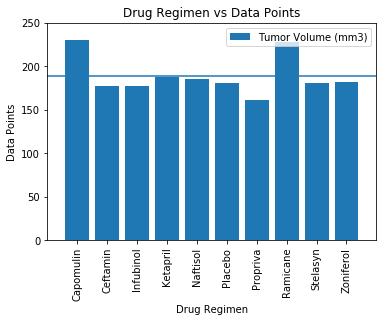

In [76]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

dataFrame = Data_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].count()

a= dataFrame.plot(kind="bar", figsize=(5.9,4), width = 0.8,title= "Drug Regimen vs Data Points")
a.set_xlabel("Drug Regimen")
a.set_ylabel("Data Points")
mean = dataFrame["Tumor Volume (mm3)"].mean()
a.axhline(mean)   #EXTRA
a.set_xlim(-1, 10)
a.set_ylim(0,250)



<function matplotlib.pyplot.show(*args, **kw)>

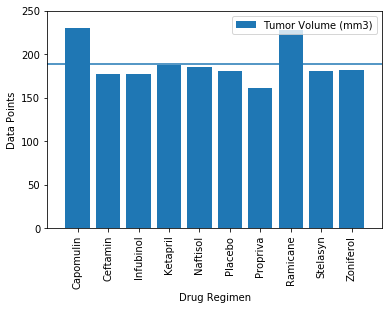

In [56]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
DPperTreatment = Data_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].count()
plt.bar(DPperTreatment.index, DPperTreatment["Tumor Volume (mm3)"])
plt.xticks(label="Tumor Volume (mm3)", rotation="vertical")
plt.legend(["Tumor Volume (mm3)"])
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.xlim(-1, 10)
plt.ylim(0,250)
mean = dataFrame["Tumor Volume (mm3)"].mean()
plt.axhline(mean) # EXTRA
plt.show

## Pie plots

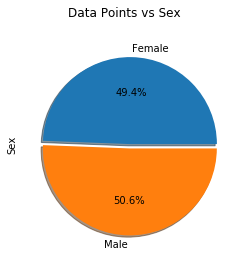

In [122]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
DPperTreatment = Data_df.groupby(["Sex"])[["Sex"]].count()
a= DPperTreatment.plot(kind="pie", 
                       legend=None,
                       shadow = True,
                       subplots = True,
                        autopct='%1.1f%%', 
                        explode=(0, 0.05),
                        title= "Data Points vs Sex",
                        )


In [6]:
DPperTreatment

,Sex
Sex,
Female,935
Male,958


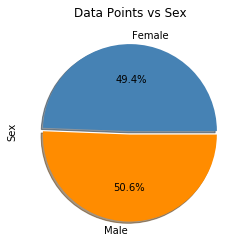

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["steelblue", "darkorange"]
plt.pie( DPperTreatment["Sex"],
        labels=DPperTreatment.index,
        shadow=True,
        colors=colors,
        explode=(0, 0.04),
        startangle=0,
        autopct='%1.1f%%',
       )
plt.title("Data Points vs Sex")
plt.ylabel("Sex")
plt.show()

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

#Calculus of the four best treatments according to a less grouth of the tumor volume across time.
MinRes = Data_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].min()
MaxRes = Data_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].max()
MinMax =pd.merge(MinRes, MaxRes, how='outer', on=['Drug Regimen'])
MinMax["Tumor Difference(mm3)"] = MaxRes-MinRes
MinMax = MinMax.sort_values(["Tumor Difference(mm3)"], ascending=True)
MinMax = MinMax.rename(columns={"Tumor Volume (mm3)_x":"Min Tumor Vol.(mm3)",
                                "Tumor Volume (mm3)_y":"Max Tumor Vol.(mm3)"}
                      )
Best4 = MinMax.head(4)

Best4 = Best4.style.format({'Min Tumor Vol.(mm3)': "{:.2f}",
                              'Max Tumor Vol.(mm3)': "{:,.2f}",
                              'Tumor Difference(mm3)': "{:.2f}",
                             })

Best4List = Best4.index.values.tolist()

In [9]:
#Se genera el Dataframe con los datos de todos los Mouse ID y los 4 mejores tratamientos.
DrugReg_df = Data_df.reset_index()
DrugReg_df = DrugReg_df[['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)']]
ADrugReg_df = DrugReg_df.groupby(["Drug Regimen","Mouse ID"])[["Tumor Volume (mm3)"]].max()
ADrugReg_df = ADrugReg_df.rename(columns={"Tumor Volume (mm3)":"Final Tumor Value (mm3)"})

#Dataframe using Loc with the 4 Best Drugs list.
ADrugReg_df.loc[Best4List]

Final Tumor Value (mm3)
Drug Regimen Mouse ID                         
Capomulin    b128                    45.651331
             b742                    45.000000
             f966                    45.000000
             g288                    46.304003
             g316                    46.809225
...                                        ...
Ramicane     s508                    45.000000
             u196                    47.622816
             w678                    45.000000
             y449                    46.378092
             z578                    45.000000

[100 rows x 1 columns]

In [10]:
#Data frame of the 4 best Drugs with out Mouse ID
ResIndex = ADrugReg_df.reset_index()
JustDrugs = ResIndex.drop('Mouse ID', axis=1)
JustDrugs = JustDrugs.set_index("Drug Regimen")
Just4BestDrugs = JustDrugs.loc[Best4List]

In [23]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
DrugQuartiles = ADrugReg_df["Final Tumor Value (mm3)"]
quartiles = DrugQuartiles.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
Median = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
ADrugReg_df["Lower Outliers?"] = ADrugReg_df['Final Tumor Value (mm3)'] < lower_bound
ADrugReg_df["Upper Outliers?"] = ADrugReg_df['Final Tumor Value (mm3)'] > upper_bound

#Count Lower Outliers
LowOutCount = ADrugReg_df.groupby(["Lower Outliers?"])[["Final Tumor Value (mm3)"]].count()
LowOutCount = LowOutCount.rename(columns={"Final Tumor Value (mm3)":"Lower Outliers"})
LowOutCount["Lower Outliers"] = LowOutCount["Lower Outliers"] - len(ADrugReg_df)
#Count Upper Outliers
UppOutCount = ADrugReg_df.groupby(["Upper Outliers?"])[["Final Tumor Value (mm3)"]].count()
UppOutCount = UppOutCount.rename(columns={"Final Tumor Value (mm3)":"Upper Outliers"})
UppOutCount["Upper Outliers"] = UppOutCount["Upper Outliers"] - len(ADrugReg_df)
Outliers = pd.DataFrame({
    "Index":"Outliers",
    "Lower Outliers": [LowOutCount["Lower Outliers"].values.tolist()],
    "Upper Outliers":[UppOutCount["Upper Outliers"].values.tolist()],
})
Outliers = Outliers.set_index("Index")
Outliers


,Lower Outliers,Upper Outliers
Index,,
Outliers,[0],[0]


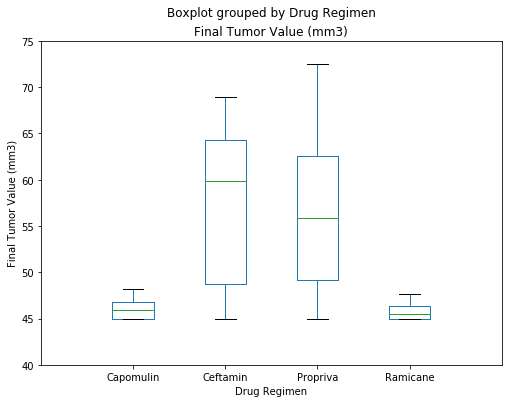

In [64]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Just4BestDrugs.boxplot(by ='Drug Regimen', figsize=(8,6), column =['Final Tumor Value (mm3)'], grid = False)
plt.ylabel("Final Tumor Value (mm3)")
plt.xlim(0, 5)
plt.ylim(40,75)
plt.show()


## Line and scatter plots

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Generates DF with only the columns needed.
Lineplot_df = Data_df[['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
Lineplot_df = Lineplot_df.reset_index()
Lineplot_df = Lineplot_df.set_index("Drug Regimen")

#Generates DF with only the information of Capmulin.
Capomulin = Lineplot_df.loc["Capomulin"]
Capomulin = Capomulin.reset_index()
Capomulin = Capomulin[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]

#Generates DF for only one Mouse (S185 ) Timepoint vs Tumor Volume for Capmulin.S185
S185 = Capomulin.set_index("Mouse ID")
S185 = S185.loc["s185"]
S185 = S185.reset_index()
S185 = S185[['Timepoint', 'Tumor Volume (mm3)']]
S185 = S185.set_index("Timepoint")


#Generates DF with othe mean Timepoint vs Tumor Volume for Capmulin.
Capomulin_df = Capomulin.groupby(["Timepoint"])[["Tumor Volume (mm3)"]].mean()

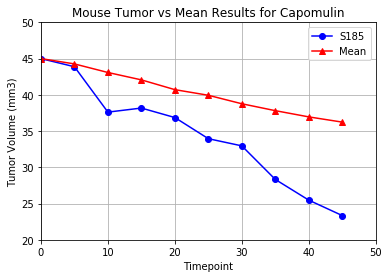

In [20]:
#Lineplot Mouse Tumor vs Mean Results over Timepoint for Capomulin
x_axis = np.arange(0,50, 5)
plt.plot(x_axis, S185, marker="o", color="blue", label="S185")# linewidth=0,
plt.plot(x_axis,Capomulin_df, marker="^", color="red", label="Mean")#,linewidth=0
plt.title("Mouse Tumor vs Mean Results for Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0, 50)
plt.ylim(20,50)
plt.grid()
plt.legend(loc="best")
plt.show()

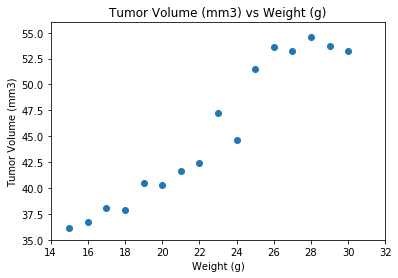

In [66]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Set DF that only cotains Mouse that uses Capomulin with their weight and Tumor Values
MvsA = Data_df[['Drug Regimen', 'Weight (g)', 'Tumor Volume (mm3)']]
MvsA = MvsA.reset_index()
MvsA = MvsA[['Drug Regimen', 'Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
MvsA = MvsA.set_index("Drug Regimen")
MvsA = MvsA.loc["Capomulin"]
MvsA = MvsA.reset_index()

TumorMean = Data_df.groupby(["Weight (g)"])[["Tumor Volume (mm3)"]].mean()
TumorMean = TumorMean.reset_index()
TumorMean

plt.scatter(TumorMean["Weight (g)"], TumorMean["Tumor Volume (mm3)"], marker="o")
plt.title("Tumor Volume (mm3) vs Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.xlim(14, 32)
plt.ylim(35,56)
plt.show()

The correlation between Weight and Ave. Tumor Volume  is 0.96


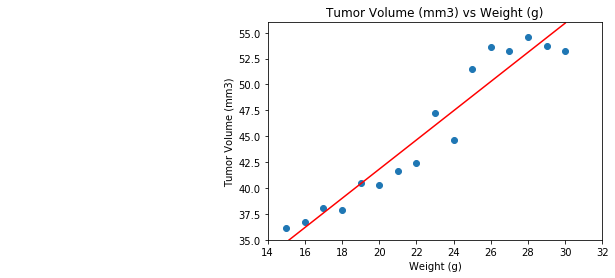

In [77]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = TumorMean["Weight (g)"]
y_values = TumorMean["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Tumor Volume (mm3) vs Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(14, 32)
plt.ylim(35,56)
correlation = st.pearsonr(TumorMean["Weight (g)"],TumorMean["Tumor Volume (mm3)"])
print(f"The correlation between Weight and Ave. Tumor Volume  is {round(correlation[0],2)}")
plt.show()